<a href="https://colab.research.google.com/github/bharadwaj213/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

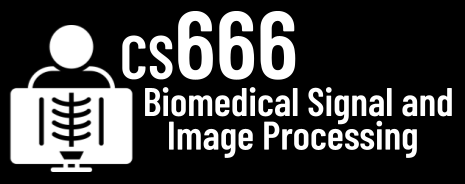

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = metadata.get('sampling_rate') ### TODO!
SECONDS = len(signal)/SAMPLING_RATE ### TODO!

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

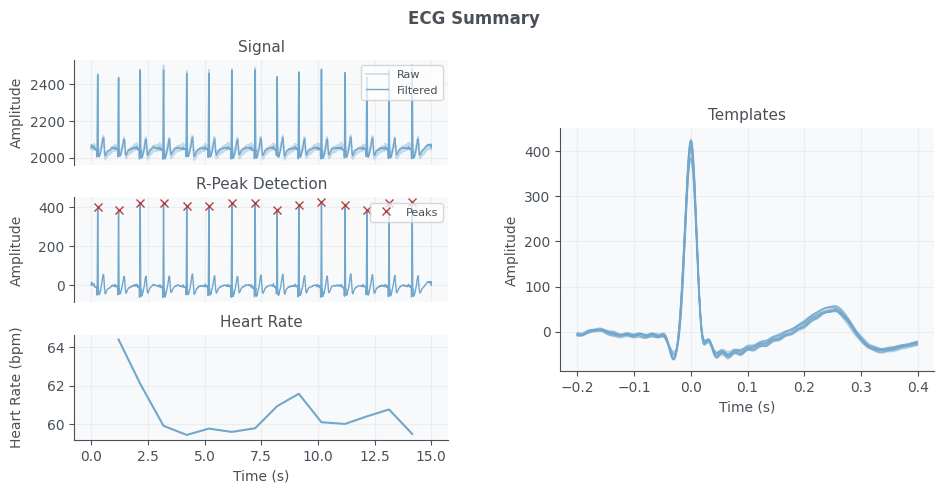

In [ ]:
### TODO
from biosppy.signals import ecg
ecg_signal = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE)#signal,SAMPLING_RATE)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

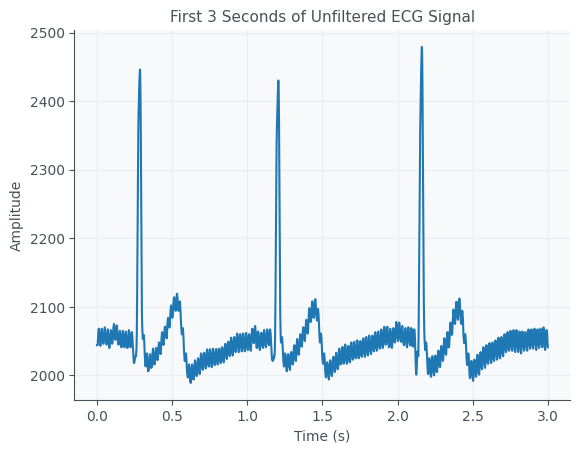

In [ ]:
### TODO plot unfiltered signal

num_samples = int(3 * SAMPLING_RATE)


time = np.linspace(0, 3, num_samples, endpoint=False)


# Plot the first three seconds of the unfiltered signal

plt.plot(time, signal[:num_samples])
plt.title('First 3 Seconds of Unfiltered ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

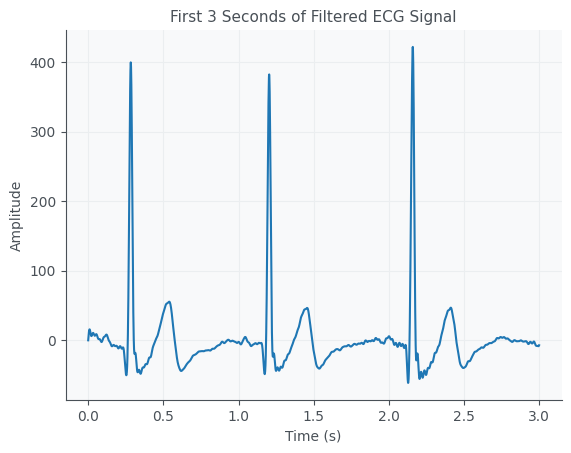

In [ ]:
### TODO plot filtered signal
filtered_signal = ecg_signal['filtered']

plt.plot(time, filtered_signal[:num_samples])
plt.title('First 3 Seconds of Filtered ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

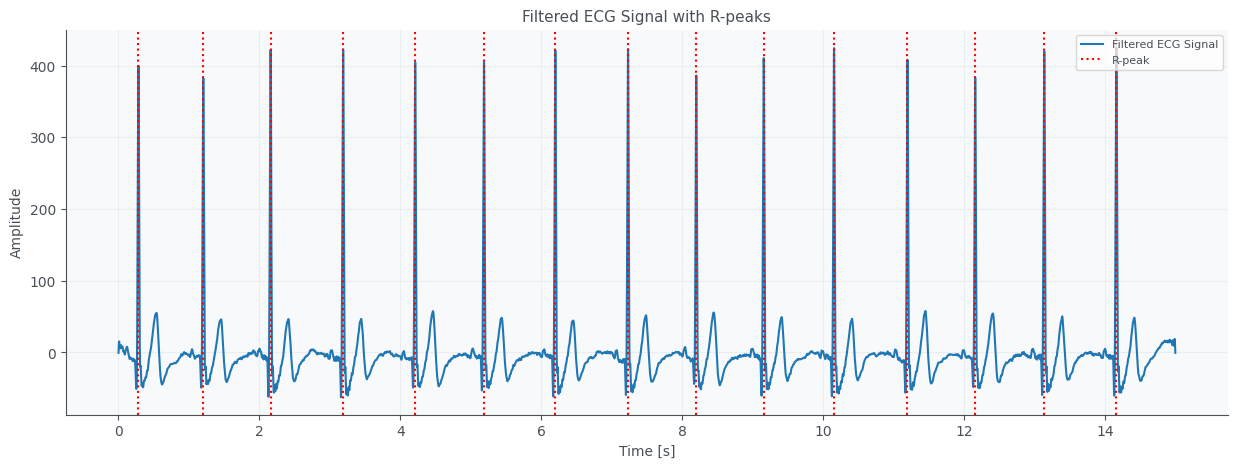

In [ ]:
### TODO

time_vector = np.linspace(0, SECONDS, len(filtered_signal), endpoint=False)
r_peaks = ecg_signal['rpeaks']

plt.figure(figsize=(15, 5))
plt.plot(time_vector, filtered_signal, label='Filtered ECG Signal')


for r_peak in r_peaks:
    plt.axvline(x=r_peak / SAMPLING_RATE, color='r', ls=':', label='R-peak' if r_peak == r_peaks[0] else "")

plt.title('Filtered ECG Signal with R-peaks')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

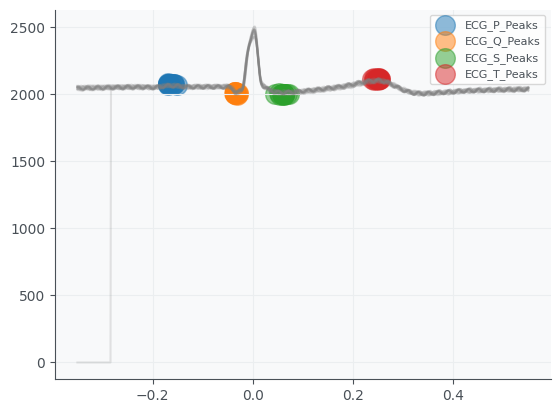

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal,r_peaks,SAMPLING_RATE,method="peak",show=True,show_type='peaks')




In [ ]:
# TODO Does the detection work well?
# YES

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [ ]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

!pip install sleepecg

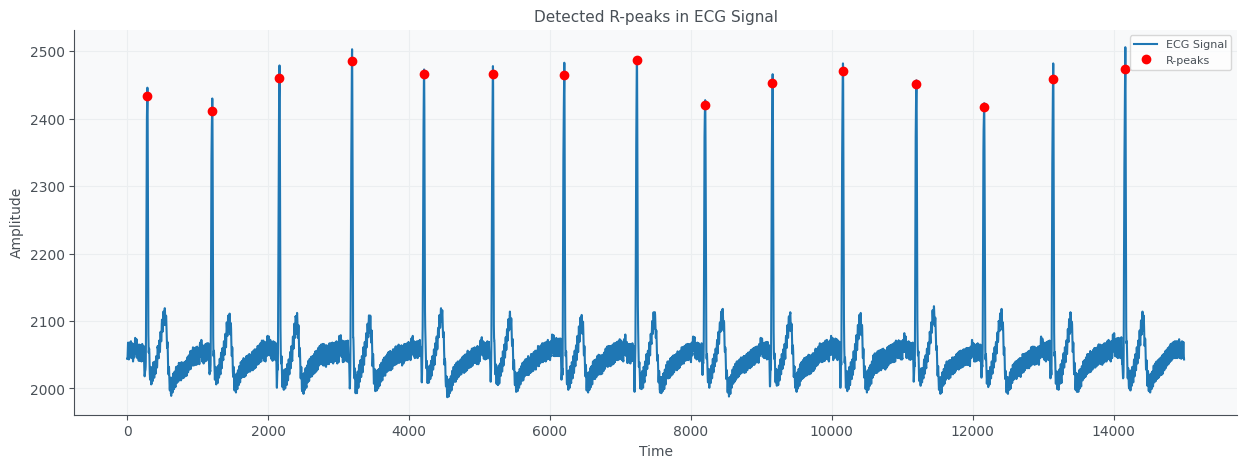

In [ ]:
# Detect R-peaks
from sleepecg import detect_heartbeats, get_toy_ecg

r_peaks2 = detect_heartbeats(signal,SAMPLING_RATE)

# Plotting the ECG signal and marking R-peaks
plt.figure(figsize=(15, 5))
plt.plot(signal, label='ECG Signal')
plt.plot(r_peaks2, signal[r_peaks2], 'ro', label='R-peaks')
plt.title('Detected R-peaks in ECG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

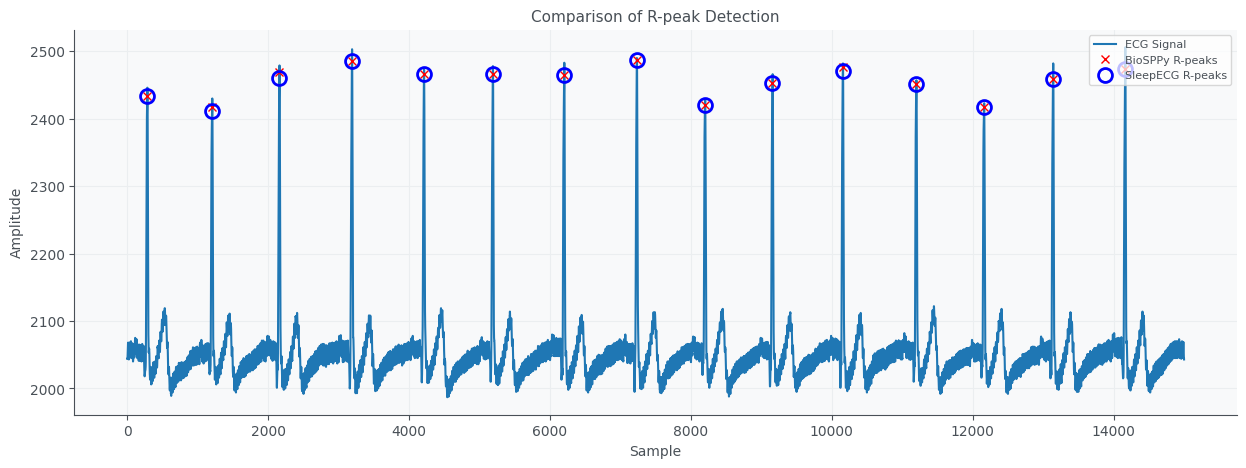

Mean Square Detection Error:  0.2


In [ ]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

plt.figure(figsize=(15, 5))
plt.plot(signal, label='ECG Signal')
plt.plot(r_peaks, signal[r_peaks], 'rx', label='BioSPPy R-peaks')
plt.plot(r_peaks2, signal[r_peaks2], 'bo', label='SleepECG R-peaks', fillstyle='none', markersize=10, markeredgewidth=2)
plt.legend()
plt.title('Comparison of R-peak Detection')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Calculate MSE

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(r_peaks,r_peaks2)
print("Mean Square Detection Error: ",mse)

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

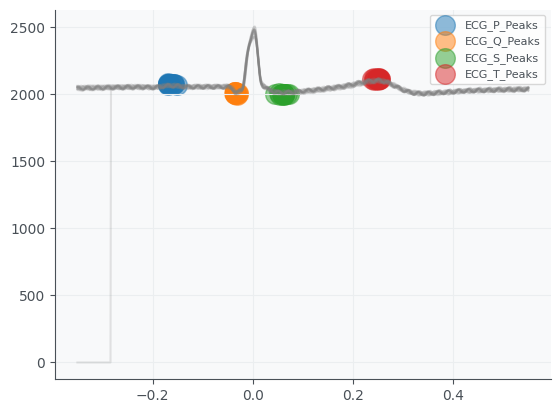

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal,r_peaks, sampling_rate=SAMPLING_RATE, method="peak",show=True)

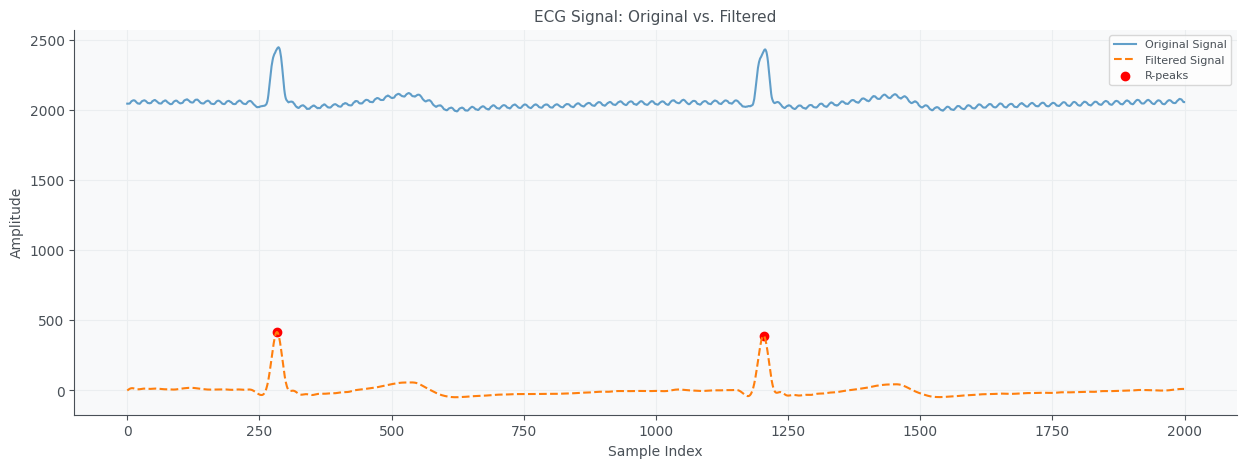

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
!pip install mne
lowcut = 0.5
highcut = 40.0
filtered_signal = nk.signal_filter(signal=signal,
                                   sampling_rate=SAMPLING_RATE,
                                   lowcut=lowcut,
                                   highcut=highcut,
                                   method='fir',
                                   order=500,  # The filter order. You might need to adjust this based on your signal.
                                   )
plt.figure(figsize=(15, 5))
plt.plot(signal[:2000], label='Original Signal', alpha=0.7)  # Plotting a segment of the original signal
plt.plot(filtered_signal[:2000], label='Filtered Signal', linestyle='--')
plt.scatter(r_peaks[r_peaks < 2000], filtered_signal[r_peaks[r_peaks < 2000]], color='red', label='R-peaks')  # Plot R-peaks on filtered signal
plt.legend()
plt.title('ECG Signal: Original vs. Filtered')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

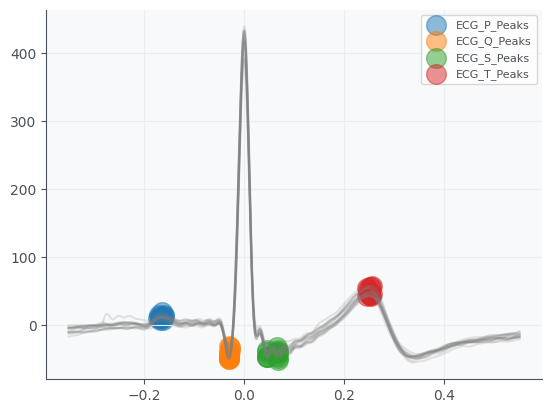

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(filtered_signal,r_peaks, sampling_rate=SAMPLING_RATE, method="peak",show=True)

In [ ]:
# TODO Which one works the best?
#Filtered signal seems to be best

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#